In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

# Baseline MLP Material Classification Experiment on Error Data

In [18]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [19]:
# drop uncomplete rows
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59871 entries, 0 to 59870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdoa12            59871 non-null  float64
 1   tdoa21            59871 non-null  float64
 2   snr_an1           59871 non-null  float64
 3   power_dif_an1     59871 non-null  float64
 4   snr_an2           59871 non-null  float64
 5   power_dif_an2     59871 non-null  float64
 6   an1_rx_snr        59871 non-null  float64
 7   an1_rx_powerdif   59871 non-null  float64
 8   an1_tof           59871 non-null  float64
 9   an2_rx_snr        59871 non-null  float64
 10  an2_rx_powerdif   59871 non-null  float64
 11  an2_tof           59871 non-null  float64
 12  material          59871 non-null  object 
 13  encoded_material  59871 non-null  int64  
 14  error             59871 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 6.9+ MB


In [21]:
# show different label types
df.encoded_material.unique()

array([1, 2, 3, 4, 5, 6])

In [22]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

<Axes: xlabel='encoded_material', ylabel='count'>

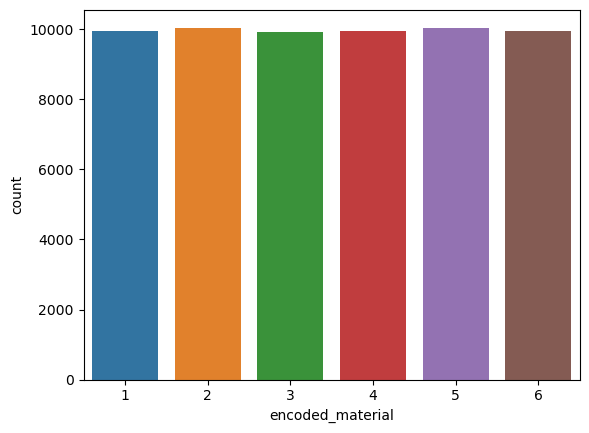

In [23]:
# plot class imbalance
sns.countplot(x=df['encoded_material'])

## Classification

In [39]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [25]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                        )

In [26]:
train_df = df.drop('material', axis=1)

In [27]:
# Extracted features 
X = train_df.drop('encoded_material', axis=1)
y = train_df['encoded_material'] # Labels

In [28]:
# Feature Scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

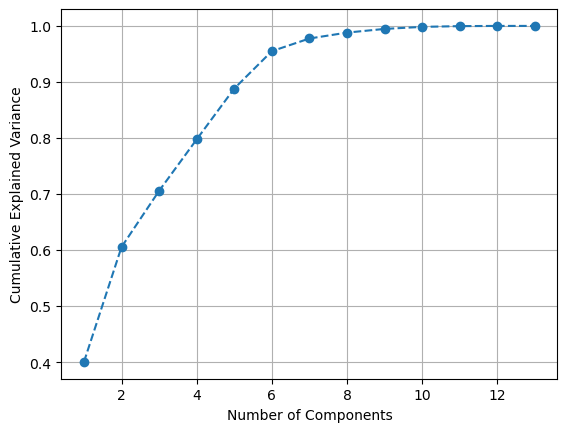

In [41]:
pca = PCA(n_components=13)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, 14), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [29]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [30]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.78874271
Iteration 2, loss = 0.52930263
Iteration 3, loss = 0.46463288
Iteration 4, loss = 0.43495153
Iteration 5, loss = 0.41835043
Iteration 6, loss = 0.41486293
Iteration 7, loss = 0.40298338
Iteration 8, loss = 0.39515526
Iteration 9, loss = 0.39101640
Iteration 10, loss = 0.38469943
Iteration 11, loss = 0.38112206
Iteration 12, loss = 0.37839097
Iteration 13, loss = 0.37423527
Iteration 14, loss = 0.37137229
Iteration 15, loss = 0.36874956
Iteration 16, loss = 0.36696120
Iteration 17, loss = 0.36417631
Iteration 18, loss = 0.36283813
Iteration 19, loss = 0.36014615
Iteration 20, loss = 0.35673104
Iteration 21, loss = 0.35446179
Iteration 22, loss = 0.35095237
Iteration 23, loss = 0.35438779
Iteration 24, loss = 0.35571782
Iteration 25, loss = 0.34657084
Iteration 26, loss = 0.34548434
Iteration 27, loss = 0.34426157
Iteration 28, loss = 0.34306377
Iteration 29, loss = 0.34003387
Iteration 30, loss = 0.34050764
Iteration 31, loss = 0.33655357
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [31]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [32]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 81.11012136733103%


In [33]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 81.28917834223172%


In [34]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 81.27023588258237%


In [35]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.8121027273765429


In [36]:
material_names = df.material.unique()

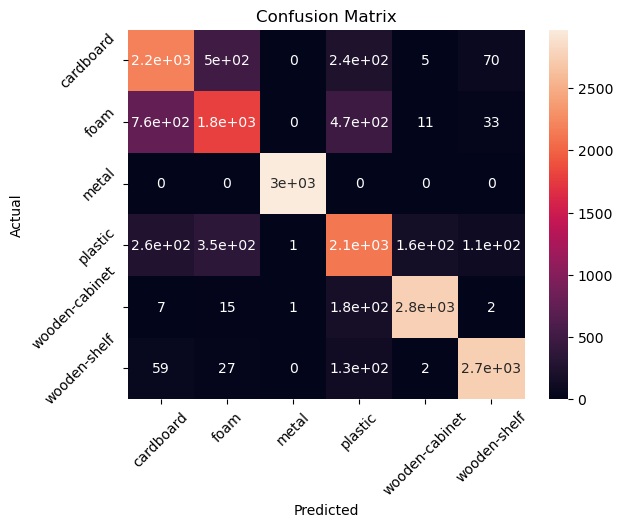

In [37]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap = sns.heatmap(cm, annot=True, xticklabels=material_names, yticklabels=material_names)

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()